In [20]:
import numpy as np
import utils
import plotting_tools as pt

from importlib import reload
import utils
utils = reload(utils)
pt = reload(pt)

from scipy import signal
import pickle
import sys
# Notebook needs to see the RKLM_Python module to load pickled class instances
sys.path.append('../RKLM_Python/')

p2_nodes
neg_debug
neg_debug


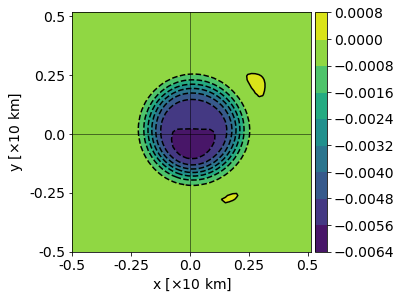

In [29]:
swe = False

attribute = 'p2_nodes'
# attribute = 'rhoY'
et = 3.0

base_fn = "output_travelling_vortex"
directory = "output_travelling_vortex"
py_directory = "../%s/Frsq=0.02/" %directory
py_directory = "../%s/" %directory

Nx, Ny = 64, 64
tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)

# base_fn = "output_travelling_vortex"
# directory = "output_travelling_vortex"
# py_directory = "../%s/" %directory

# Nx, Ny = 64, 64
# euler_tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)

times = [200]
# l_typ = 'TIME'
l_typ = 'WINDOW_STEP'
# times = [0]
tags = tc.get_tag_dict()
tag = 'ic' if times[0] == 0.0 else tags[9]
# tag = 'full_split_2'
# tag = tags[7]
        
prt = utils.prt_time(debug=False)
attr_labels = pt.labels_increment()

def get_ens(tc, sfx , diff, attribute, swe=True):
    print(sfx)
    ens = tc.get_ensemble(times, 1, attribute, sfx, label_type=l_typ, avg=True, diff=diff, tag=tag)[1]
    if swe:
        ens = ens[:,0,:]
#     else:
#         ens *= 100.0
    ens = ens.T
#     

    label = sfx + '_' + attribute
    return label, ens

diff = False
sfx1 = 'neg_debug'
# sfx1 = 'pos_debug'


print(attribute)

if swe:
    l1, a1 = get_ens(tc, sfx1, diff, attribute,swe=True)
    la = 'SWE_vortex'
    aa = a1
    lvls = np.arange(-0.0155,0.0065,0.0015) * 10.0
else:
    l2, a1 = get_ens(tc, sfx1, diff, 'rho', swe=False)
    l2, a2 = get_ens(tc, sfx1, diff, attribute, swe=False)
    la = 'Euler vortex'
    if attribute == 'rhoY':
        aa = a2 / a1
    else:
        aa = a2
    aa = a2
    lvls = np.arange(-0.0065,0.0025,0.0005) * 10.0
    
ll = [aa, '']
pl_lst = [ll]

pl = pt.plotter(pl_lst,ncols=1,figsize=(10,5),sharey=False)
x_axs = [-0.5,-0.25,0.0,0.25,0.5]
y_axs = [-0.5,-0.25,0.0,0.25,0.5]
x_loc = np.linspace(0,Nx-1,5)
y_loc = np.linspace(0,Ny-1,5)
if swe: 
    x_label = r'x [km]'
    y_label = r'y [km]'
else:
    x_label = r'x [$\times 10$ km]'
    y_label = r'y [$\times 10$ km]'

axvline = 31.5
axhline = 31.5

pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, x_label=x_label, y_label=y_label, axhline=axhline, axvline=axvline)
_ = pl.plot(aspect='equal',method='contour')

lbl = 'swe' if swe else 'euler'
# pl.save_fig('./output/euler_imprint')